# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import time
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
## EDA
dataset  = pd.read_csv("GermanCredit.csv.zip", sep = ',')
print(dataset.shape)
print(dataset.info())
dataset.describe()

(1000, 62)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Duration                                1000 non-null   int64 
 1   Amount                                  1000 non-null   int64 
 2   InstallmentRatePercentage               1000 non-null   int64 
 3   ResidenceDuration                       1000 non-null   int64 
 4   Age                                     1000 non-null   int64 
 5   NumberExistingCredits                   1000 non-null   int64 
 6   NumberPeopleMaintenance                 1000 non-null   int64 
 7   Telephone                               1000 non-null   int64 
 8   ForeignWorker                           1000 non-null   int64 
 9   Class                                   1000 non-null   object
 10  CheckingAccountStatus.lt.0              1000 non-null   int64 

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.596000,0.963000,0.274000,...,0.13900,0.047000,0.814000,0.179000,0.713000,0.108000,0.022000,0.2000,0.630000,0.148000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.490943,0.188856,0.446232,...,0.34612,0.211745,0.389301,0.383544,0.452588,0.310536,0.146757,0.4002,0.483046,0.355278
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000


In [3]:
dataset = dataset.replace({'Class': {'Good': 1, 'Bad': 0}})
labels = dataset['Class']
data = dataset.loc[:, dataset.columns != 'Class']

X_train, X_test, y_train, y_test =  train_test_split( data, labels, test_size=0.30, random_state=1)

## DecisionTreeClassifier

In [4]:
DecisionTreeClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [5]:
# Initialize the classifier and fit to data
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print(classification_report(y_test, y_pred))

#Hyperparameter Tuning
ccp_alpha_space = [0,0.01,0.05,0.1]
max_depth_space = [2,4,7,10] 
max_features_space = ['auto',None,'sqrt','log2'] 
min_impurity_split_space = [0.05, 0.1, 0.5]
min_samples_leaf_space = [5,10,15,20]


param_grid = dict(ccp_alpha = ccp_alpha_space,
                  max_depth = max_depth_space,
                  max_features = max_features_space,
                  min_impurity_split = min_impurity_split_space,
                  min_samples_leaf = min_samples_leaf_space)

grid = GridSearchCV(estimator  = dtc, param_grid = param_grid, cv =10 , n_jobs = -1)

start_time = time.time()
grid_result = grid.fit(data,labels)


#Summarize results
print("Best Result: {} using {}".format(grid_result.best_score_, grid_result.best_params_))
dtc_time = str((time.time() - start_time))
print("Execution time: " +dtc_time + ' s')

              precision    recall  f1-score   support

           0       0.42      0.44      0.43        86
           1       0.77      0.76      0.76       214

    accuracy                           0.67       300
   macro avg       0.60      0.60      0.60       300
weighted avg       0.67      0.67      0.67       300

Best Result: 0.724 using {'ccp_alpha': 0, 'max_depth': 7, 'max_features': 'auto', 'min_impurity_split': 0.1, 'min_samples_leaf': 5}
Execution time: 27.67632293701172 s


### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [6]:
! pip install dtreeviz

  Using cached dtreeviz-1.3-py3-none-any.whl
  Using cached graphviz-0.17-py3-none-any.whl (18 kB)
  Using cached colour-0.1.5-py2.py3-none-any.whl (23 kB)
  Using cached pytest-6.2.4-py3-none-any.whl (280 kB)
     |████████████████████████████████| 40 kB 2.2 MB/s eta 0:00:01
  Using cached py-1.10.0-py2.py3-none-any.whl (97 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)
  Using cached iniconfig-1.1.1-py2.py3-none-any.whl (5.0 kB)
  Using cached pluggy-0.13.1-py2.py3-none-any.whl (18 kB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [7]:
dtc = DecisionTreeClassifier(**grid.best_params_)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
dtc_report = classification_report(y_test, y_pred,output_dict=True)

If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

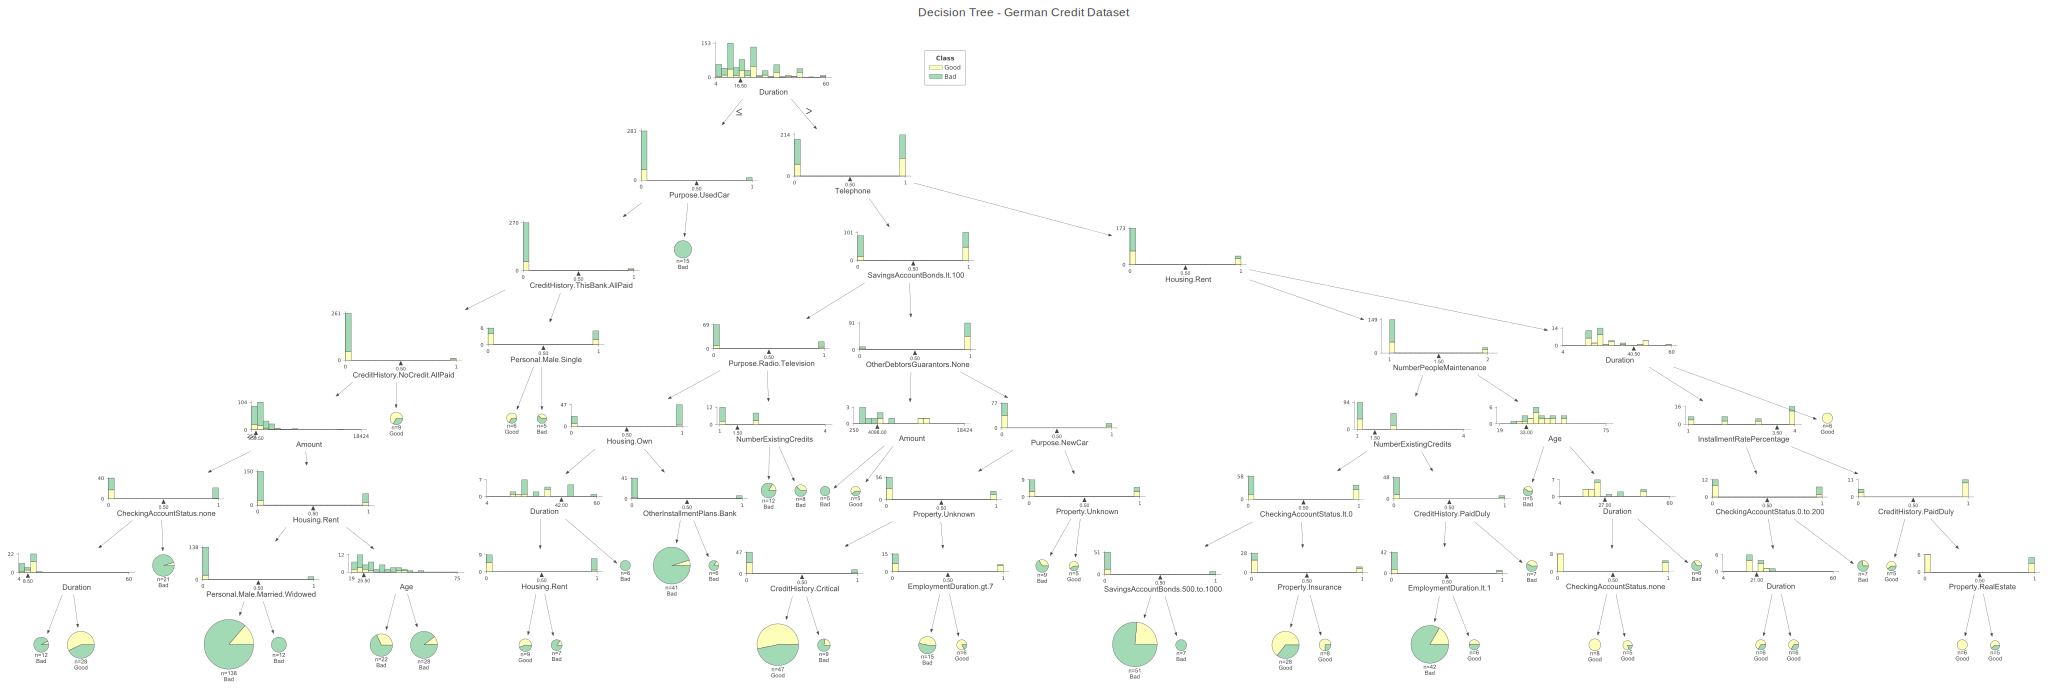

In [8]:
from sklearn import tree
from dtreeviz.trees import *


viz = dtreeviz(dtc, 
               x_data=X_train,
               y_data=y_train,
               target_name= labels.name,
               feature_names= data.columns, 
               class_names=list(['Good','Bad']), 
               title="Decision Tree - German Credit Dataset")
viz

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [9]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [10]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print(classification_report(y_test, y_pred))


#Hyperparamter Tuning
n_estimators_space = [5,20,50,100]
ccp_alpha_space = [0,0.01,0.05,0.1]
max_depth_space = [2,4,7,10] 
max_features_space = ['auto',None,'sqrt','log2'] 
min_impurity_split_space = [0.05, 0.1, 0.5]
min_samples_leaf_space = [5,10,15,20]


param_grid = dict(n_estimators = n_estimators_space,
                  ccp_alpha = ccp_alpha_space,
                  max_depth = max_depth_space,
                  max_features = max_features_space,
                  min_impurity_split = min_impurity_split_space,
                  min_samples_leaf = min_samples_leaf_space)

#Summarize results
random = RandomizedSearchCV(estimator = rfc, param_distributions = param_grid, cv = 10, n_jobs = -1)
start_time = time.time()
random_result = random.fit(data,labels)
print("Best Result: {} using {}".format(random_result.best_score_, random_result.best_params_))
print("Execution time: " +str((time.time() - start_time)) + ' s')


              precision    recall  f1-score   support

           0       0.59      0.30      0.40        86
           1       0.77      0.92      0.83       214

    accuracy                           0.74       300
   macro avg       0.68      0.61      0.62       300
weighted avg       0.72      0.74      0.71       300

Best Result: 0.742 using {'n_estimators': 50, 'min_samples_leaf': 10, 'min_impurity_split': 0.05, 'max_features': 'auto', 'max_depth': 10, 'ccp_alpha': 0}
Execution time: 5.098006963729858 s


As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

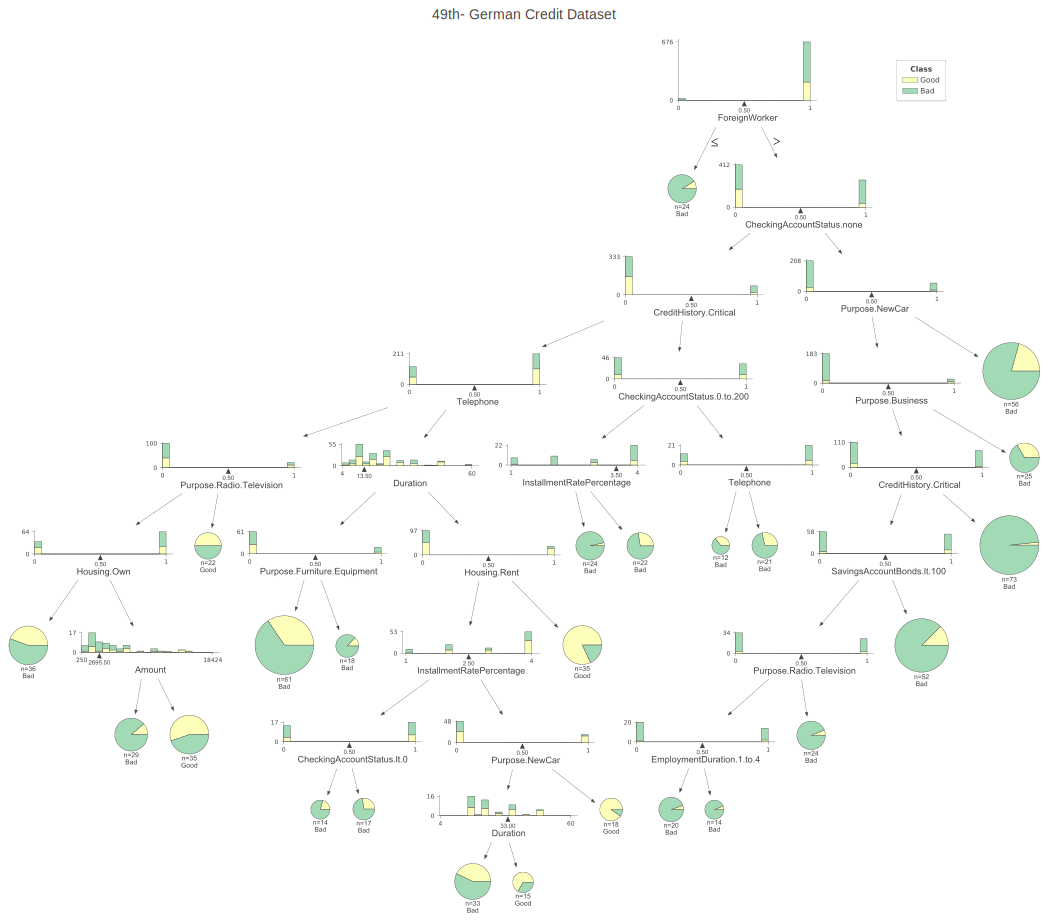

In [11]:
rfc = RandomForestClassifier(**random_result.best_params_)
rfc.fit(X_train, y_train)


best_n_estimators = random_result.best_params_['n_estimators']
n= best_n_estimators - 1
viz = dtreeviz(rfc.estimators_[n], 
                   x_data=X_train,
                   y_data=y_train,
                   target_name= labels.name,
                   feature_names= data.columns, 
                   class_names=list(['Good','Bad']), 
                   title="{}th- German Credit Dataset".format(n))

rfc.fit(data, labels)
viz


A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [12]:
! pip install pdpbox

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


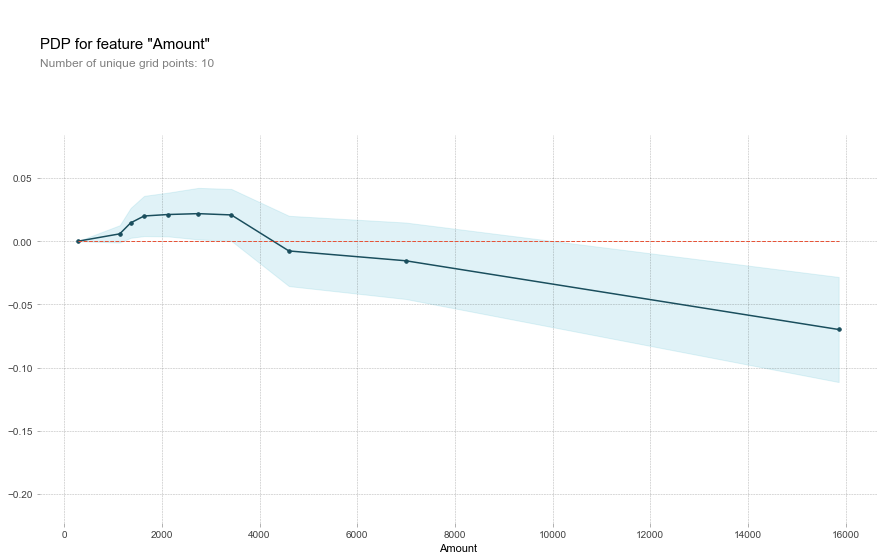

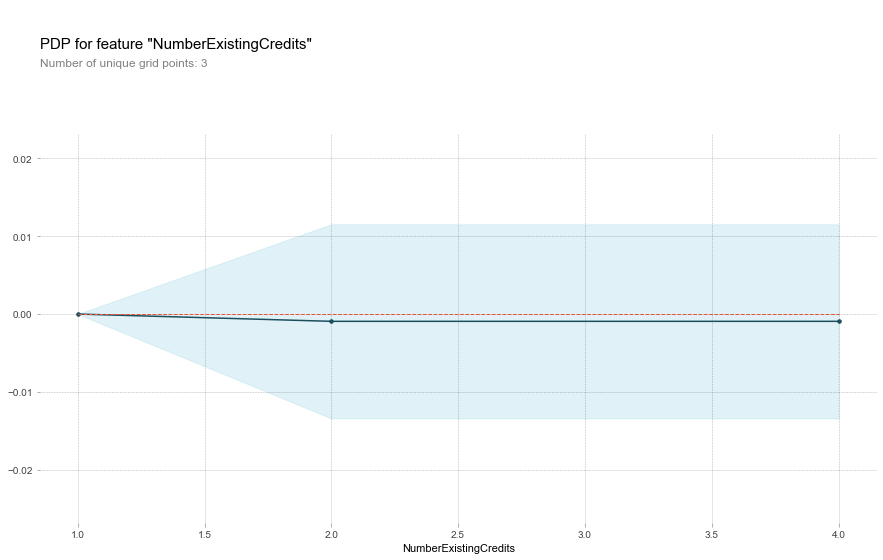

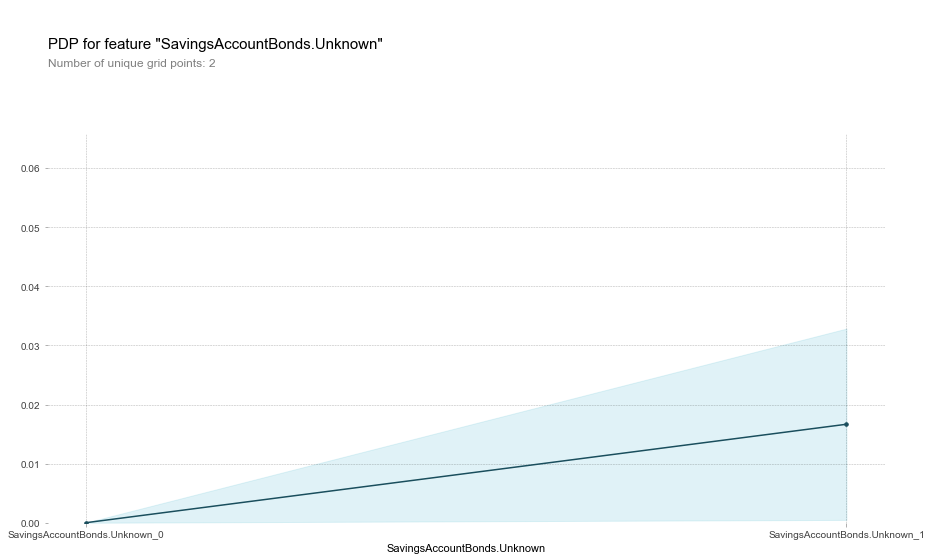

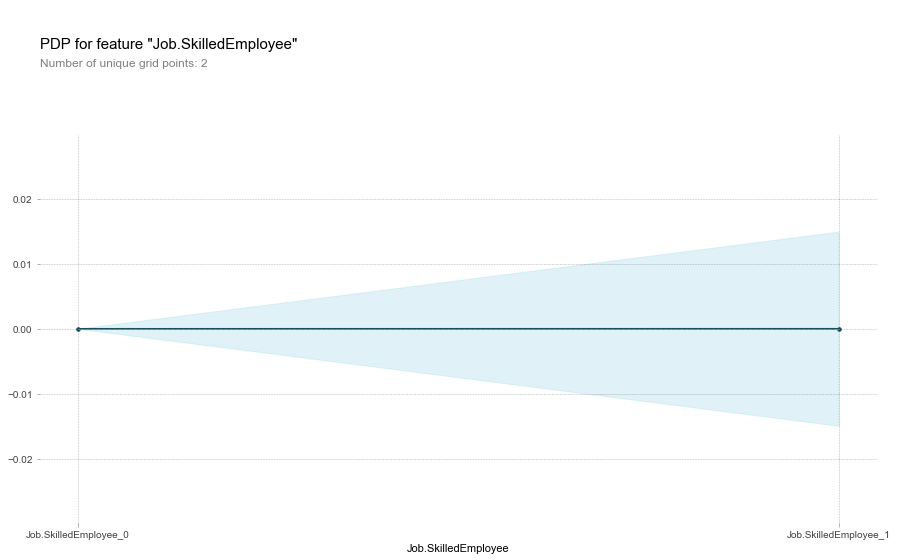

In [13]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

features = ['Amount','NumberExistingCredits',
                    'SavingsAccountBonds.Unknown','Job.SkilledEmployee']
for feature in features:
    pdp_dist = pdp.pdp_isolate(model=rfc, dataset=X_test, 
                           model_features=data.columns, feature=feature)
    pdp.pdp_plot(pdp_dist, feature)
    plt.show()


While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [14]:
#! conda install -c anaconda py-xgboost
#! conda install -c conda-forge catboost
#! conda install -c conda-forge lightgbm

In [15]:
from xgboost import XGBClassifier
#XGBClassifier?

In [16]:
from catboost import CatBoostClassifier
#CatBoostClassifier?

In [17]:
from lightgbm import LGBMClassifier
#LGBMClassifier?

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

In [19]:
#Hyperparameter Tuning
n_estimators_space = [5,20,50,100]
max_depth_space = [2,4,7,10] 
learning_rate_space= [0.5, 0.1, 0.01]
    
param_grid = dict(
                  n_estimators = n_estimators_space,
                  learning_rate=learning_rate_space,
                  max_depth=max_depth_space
            )

In [20]:
rows_names = ['dtc','rfc','xgb','cbc','lgbm']
cols_names = ['n_estimators','max_depth','learning_rate','time (s)','accuracy']

results_df = pd.DataFrame(columns=cols_names, index=rows_names)

## DecisionTree

In [21]:
results_df.loc['dtc'] = pd.Series({'n_estimators': 1,
                                   'max_depth':grid.best_params_['max_depth'],
                                   'learning_rate':None,
                                   'time (s)':np.round(float(dtc_time),2),
                                   'accuracy':np.round(dtc_report['accuracy'],2)})


## RandomForest

In [22]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)


# learning rate is not a parameter of randomforest
rfc_param_grid = param_grid.copy()
if 'learning_rate' in rfc_param_grid.keys():
    rfc_param_grid.pop('learning_rate')

#Summarize results
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = rfc_param_grid,cv = 10, n_jobs = -1  )
start_time = time.time()
rfc_random_result = rfc_random.fit(data,labels)
print("Best: %f using %s" %(rfc_random_result.best_score_, rfc_random_result.best_params_))
rfc_time = str((time.time() - start_time))
print("Execution time: " +rfc_time + ' s')



rfc = RandomForestClassifier(**rfc_random_result.best_params_)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc_report = classification_report(y_test, y_pred,output_dict=True)

results_df.loc['rfc'] = pd.Series({'n_estimators': rfc_random_result.best_params_['n_estimators'],
                                   'max_depth':rfc_random_result.best_params_['max_depth'],
                                   'learning_rate':None,
                                   'time (s)':np.round(float(rfc_time),2),
                                   'accuracy':np.round(rfc_report['accuracy'],2)})


Best: 0.768000 using {'n_estimators': 50, 'max_depth': 10}
Execution time: 4.471848964691162 s


## XGBoost

In [23]:
xgb = XGBClassifier(objective='binary:logistic', random_state = 1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
xgb_report = classification_report(y_test, y_pred)


#Summarize results
xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = param_grid,cv = 10, n_jobs = -1  )
start_time = time.time()
xgb_random_result = xgb_random.fit(data,labels)
print("Best: %f using %s" %(xgb_random_result.best_score_, xgb_random_result.best_params_))
xgb_time = str((time.time() - start_time))
print("Execution time: " + xgb_time + ' s')



xgb = XGBClassifier(**xgb_random_result.best_params_)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
xgb_report = classification_report(y_test, y_pred,output_dict=True)

results_df.loc['xgb'] = pd.Series({'n_estimators': xgb_random_result.best_params_['n_estimators'],
                                   'max_depth':xgb_random_result.best_params_['max_depth'],
                                   'learning_rate':xgb_random_result.best_params_['learning_rate'],
                                   'time (s)':np.round(float(xgb_time),2),
                                   'accuracy':np.round(xgb_report['accuracy'],2)})



[17:14:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:15:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: 0.765000 using {'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.5}
Execution time: 8.575711011886597 s
[17:15:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## CatBoost

In [24]:
cbc = CatBoostClassifier()
cbc.fit(X_train, y_train)
y_pred = cbc.predict(X_test)
cbc_report = classification_report(y_test, y_pred)


#Summarize results
cbc_random = RandomizedSearchCV(estimator = cbc, param_distributions = param_grid)
start_time = time.time()
cbc_random_result = cbc_random.fit(data,labels)
print("Best: %f using %s" %(cbc_random_result.best_score_, cbc_random_result.best_params_))
cbc_time = str((time.time() - start_time))
print("Execution time: " +cbc_time + ' s')

cbc = CatBoostClassifier(**cbc_random_result.best_params_)
cbc.fit(X_train, y_train)
y_pred = cbc.predict(X_test)
cbc_report = classification_report(y_test, y_pred,output_dict=True)

results_df.loc['cbc'] = pd.Series({'n_estimators': cbc_random_result.best_params_['n_estimators'],
                                   'max_depth':cbc_random_result.best_params_['max_depth'],
                                   'learning_rate':cbc_random_result.best_params_['learning_rate'],
                                   'time (s)':np.round(float(cbc_time),2),
                                   'accuracy':np.round(cbc_report['accuracy'],2)})


Learning rate set to 0.008847
0:	learn: 0.6898950	total: 57.5ms	remaining: 57.4s
1:	learn: 0.6856570	total: 59.4ms	remaining: 29.7s
2:	learn: 0.6823032	total: 61.5ms	remaining: 20.4s
3:	learn: 0.6786897	total: 63.3ms	remaining: 15.8s
4:	learn: 0.6743107	total: 65ms	remaining: 12.9s
5:	learn: 0.6706273	total: 67.4ms	remaining: 11.2s
6:	learn: 0.6674377	total: 69.3ms	remaining: 9.84s
7:	learn: 0.6641741	total: 71ms	remaining: 8.81s
8:	learn: 0.6606534	total: 72.8ms	remaining: 8.01s
9:	learn: 0.6582153	total: 74.4ms	remaining: 7.37s
10:	learn: 0.6551319	total: 75.9ms	remaining: 6.83s
11:	learn: 0.6521976	total: 77.4ms	remaining: 6.38s
12:	learn: 0.6494701	total: 78.9ms	remaining: 5.99s
13:	learn: 0.6468843	total: 80.4ms	remaining: 5.66s
14:	learn: 0.6435583	total: 82ms	remaining: 5.39s
15:	learn: 0.6408175	total: 83.5ms	remaining: 5.13s
16:	learn: 0.6381534	total: 85.2ms	remaining: 4.93s
17:	learn: 0.6351825	total: 86.8ms	remaining: 4.74s
18:	learn: 0.6324468	total: 88.3ms	remaining: 4.56

191:	learn: 0.4311572	total: 362ms	remaining: 1.52s
192:	learn: 0.4302343	total: 364ms	remaining: 1.52s
193:	learn: 0.4293304	total: 366ms	remaining: 1.52s
194:	learn: 0.4288787	total: 367ms	remaining: 1.52s
195:	learn: 0.4281009	total: 369ms	remaining: 1.51s
196:	learn: 0.4276228	total: 371ms	remaining: 1.51s
197:	learn: 0.4268749	total: 373ms	remaining: 1.51s
198:	learn: 0.4263496	total: 374ms	remaining: 1.51s
199:	learn: 0.4258372	total: 376ms	remaining: 1.5s
200:	learn: 0.4252813	total: 378ms	remaining: 1.5s
201:	learn: 0.4246203	total: 380ms	remaining: 1.5s
202:	learn: 0.4238062	total: 382ms	remaining: 1.5s
203:	learn: 0.4236148	total: 383ms	remaining: 1.49s
204:	learn: 0.4231038	total: 385ms	remaining: 1.49s
205:	learn: 0.4225047	total: 387ms	remaining: 1.49s
206:	learn: 0.4220669	total: 388ms	remaining: 1.49s
207:	learn: 0.4214174	total: 390ms	remaining: 1.49s
208:	learn: 0.4208829	total: 392ms	remaining: 1.48s
209:	learn: 0.4202579	total: 394ms	remaining: 1.48s
210:	learn: 0.41

411:	learn: 0.3331041	total: 722ms	remaining: 1.03s
412:	learn: 0.3328846	total: 724ms	remaining: 1.03s
413:	learn: 0.3326282	total: 725ms	remaining: 1.03s
414:	learn: 0.3322431	total: 727ms	remaining: 1.02s
415:	learn: 0.3320181	total: 729ms	remaining: 1.02s
416:	learn: 0.3318689	total: 730ms	remaining: 1.02s
417:	learn: 0.3314465	total: 732ms	remaining: 1.02s
418:	learn: 0.3311044	total: 733ms	remaining: 1.02s
419:	learn: 0.3307663	total: 735ms	remaining: 1.01s
420:	learn: 0.3304261	total: 737ms	remaining: 1.01s
421:	learn: 0.3300553	total: 739ms	remaining: 1.01s
422:	learn: 0.3296833	total: 741ms	remaining: 1.01s
423:	learn: 0.3293853	total: 742ms	remaining: 1.01s
424:	learn: 0.3290849	total: 744ms	remaining: 1.01s
425:	learn: 0.3288507	total: 746ms	remaining: 1s
426:	learn: 0.3286768	total: 748ms	remaining: 1s
427:	learn: 0.3284082	total: 750ms	remaining: 1s
428:	learn: 0.3281476	total: 751ms	remaining: 1000ms
429:	learn: 0.3278379	total: 753ms	remaining: 998ms
430:	learn: 0.327457

624:	learn: 0.2702401	total: 1.08s	remaining: 650ms
625:	learn: 0.2700120	total: 1.08s	remaining: 648ms
626:	learn: 0.2697343	total: 1.09s	remaining: 646ms
627:	learn: 0.2694874	total: 1.09s	remaining: 645ms
628:	learn: 0.2691974	total: 1.09s	remaining: 643ms
629:	learn: 0.2689030	total: 1.09s	remaining: 641ms
630:	learn: 0.2686707	total: 1.09s	remaining: 640ms
631:	learn: 0.2684330	total: 1.09s	remaining: 638ms
632:	learn: 0.2682016	total: 1.1s	remaining: 636ms
633:	learn: 0.2679882	total: 1.1s	remaining: 634ms
634:	learn: 0.2678375	total: 1.1s	remaining: 633ms
635:	learn: 0.2673670	total: 1.1s	remaining: 631ms
636:	learn: 0.2670345	total: 1.1s	remaining: 629ms
637:	learn: 0.2666971	total: 1.11s	remaining: 628ms
638:	learn: 0.2665110	total: 1.11s	remaining: 626ms
639:	learn: 0.2663091	total: 1.11s	remaining: 624ms
640:	learn: 0.2660555	total: 1.11s	remaining: 622ms
641:	learn: 0.2658264	total: 1.11s	remaining: 620ms
642:	learn: 0.2655206	total: 1.11s	remaining: 619ms
643:	learn: 0.265

845:	learn: 0.2188162	total: 1.44s	remaining: 262ms
846:	learn: 0.2186227	total: 1.44s	remaining: 261ms
847:	learn: 0.2184878	total: 1.45s	remaining: 259ms
848:	learn: 0.2182835	total: 1.45s	remaining: 257ms
849:	learn: 0.2180652	total: 1.45s	remaining: 256ms
850:	learn: 0.2178547	total: 1.45s	remaining: 254ms
851:	learn: 0.2175948	total: 1.45s	remaining: 252ms
852:	learn: 0.2174253	total: 1.45s	remaining: 251ms
853:	learn: 0.2172158	total: 1.46s	remaining: 249ms
854:	learn: 0.2170305	total: 1.46s	remaining: 247ms
855:	learn: 0.2166276	total: 1.46s	remaining: 245ms
856:	learn: 0.2163687	total: 1.46s	remaining: 244ms
857:	learn: 0.2161541	total: 1.46s	remaining: 242ms
858:	learn: 0.2160396	total: 1.46s	remaining: 240ms
859:	learn: 0.2158723	total: 1.47s	remaining: 239ms
860:	learn: 0.2155104	total: 1.47s	remaining: 237ms
861:	learn: 0.2152671	total: 1.47s	remaining: 235ms
862:	learn: 0.2151336	total: 1.47s	remaining: 234ms
863:	learn: 0.2149486	total: 1.47s	remaining: 232ms
864:	learn: 

7:	learn: 0.6535529	total: 76.1ms	remaining: 114ms
8:	learn: 0.6487228	total: 84.9ms	remaining: 104ms
9:	learn: 0.6441507	total: 95.9ms	remaining: 95.9ms
10:	learn: 0.6391220	total: 105ms	remaining: 85.9ms
11:	learn: 0.6341617	total: 114ms	remaining: 76ms
12:	learn: 0.6295086	total: 125ms	remaining: 67.2ms
13:	learn: 0.6246331	total: 135ms	remaining: 58ms
14:	learn: 0.6201512	total: 146ms	remaining: 48.7ms
15:	learn: 0.6149380	total: 157ms	remaining: 39.1ms
16:	learn: 0.6126413	total: 157ms	remaining: 27.8ms
17:	learn: 0.6109434	total: 158ms	remaining: 17.6ms
18:	learn: 0.6066410	total: 169ms	remaining: 8.88ms
19:	learn: 0.6019236	total: 179ms	remaining: 0us
0:	learn: 0.6867670	total: 11.3ms	remaining: 214ms
1:	learn: 0.6837310	total: 12.3ms	remaining: 110ms
2:	learn: 0.6784587	total: 23.2ms	remaining: 132ms
3:	learn: 0.6728652	total: 33.8ms	remaining: 135ms
4:	learn: 0.6681293	total: 42.8ms	remaining: 128ms
5:	learn: 0.6629765	total: 51.2ms	remaining: 120ms
6:	learn: 0.6577023	total: 

0:	learn: 0.6896054	total: 1.75ms	remaining: 85.9ms
1:	learn: 0.6862251	total: 3.08ms	remaining: 73.8ms
2:	learn: 0.6826401	total: 4.57ms	remaining: 71.7ms
3:	learn: 0.6790980	total: 6.33ms	remaining: 72.8ms
4:	learn: 0.6760497	total: 7.66ms	remaining: 69ms
5:	learn: 0.6732670	total: 8.92ms	remaining: 65.4ms
6:	learn: 0.6700002	total: 10.1ms	remaining: 62.3ms
7:	learn: 0.6668225	total: 11.4ms	remaining: 59.9ms
8:	learn: 0.6637482	total: 12.7ms	remaining: 57.7ms
9:	learn: 0.6606227	total: 14ms	remaining: 56.1ms
10:	learn: 0.6587119	total: 15.5ms	remaining: 54.9ms
11:	learn: 0.6558747	total: 16.6ms	remaining: 52.7ms
12:	learn: 0.6530049	total: 18.1ms	remaining: 51.6ms
13:	learn: 0.6499341	total: 19.5ms	remaining: 50.2ms
14:	learn: 0.6474525	total: 21ms	remaining: 49ms
15:	learn: 0.6446065	total: 22.3ms	remaining: 47.4ms
16:	learn: 0.6420354	total: 23.6ms	remaining: 45.9ms
17:	learn: 0.6394009	total: 25ms	remaining: 44.4ms
18:	learn: 0.6372158	total: 26.2ms	remaining: 42.7ms
19:	learn: 0.

0:	learn: 0.6893727	total: 1.29ms	remaining: 128ms
1:	learn: 0.6858324	total: 2.77ms	remaining: 136ms
2:	learn: 0.6824462	total: 3.97ms	remaining: 128ms
3:	learn: 0.6794234	total: 5.21ms	remaining: 125ms
4:	learn: 0.6759807	total: 6.42ms	remaining: 122ms
5:	learn: 0.6727243	total: 7.75ms	remaining: 121ms
6:	learn: 0.6694125	total: 9.06ms	remaining: 120ms
7:	learn: 0.6660703	total: 10.3ms	remaining: 118ms
8:	learn: 0.6626024	total: 11.5ms	remaining: 116ms
9:	learn: 0.6599767	total: 12.9ms	remaining: 116ms
10:	learn: 0.6578191	total: 14.4ms	remaining: 117ms
11:	learn: 0.6546989	total: 16ms	remaining: 117ms
12:	learn: 0.6523793	total: 17.3ms	remaining: 116ms
13:	learn: 0.6493554	total: 18.6ms	remaining: 114ms
14:	learn: 0.6466955	total: 19.8ms	remaining: 112ms
15:	learn: 0.6436314	total: 21ms	remaining: 110ms
16:	learn: 0.6405660	total: 22.4ms	remaining: 109ms
17:	learn: 0.6382436	total: 23.5ms	remaining: 107ms
18:	learn: 0.6361759	total: 24.7ms	remaining: 105ms
19:	learn: 0.6344300	total

40:	learn: 0.5870332	total: 51.3ms	remaining: 73.8ms
41:	learn: 0.5853578	total: 52.6ms	remaining: 72.7ms
42:	learn: 0.5834490	total: 53.9ms	remaining: 71.4ms
43:	learn: 0.5819433	total: 55.2ms	remaining: 70.2ms
44:	learn: 0.5809974	total: 56.4ms	remaining: 69ms
45:	learn: 0.5792762	total: 57.6ms	remaining: 67.6ms
46:	learn: 0.5772839	total: 58.7ms	remaining: 66.2ms
47:	learn: 0.5753018	total: 60.1ms	remaining: 65.1ms
48:	learn: 0.5743958	total: 61.5ms	remaining: 64ms
49:	learn: 0.5728510	total: 63.1ms	remaining: 63.1ms
50:	learn: 0.5713395	total: 64.5ms	remaining: 62ms
51:	learn: 0.5695999	total: 65.5ms	remaining: 60.5ms
52:	learn: 0.5683520	total: 66.8ms	remaining: 59.3ms
53:	learn: 0.5668252	total: 68.1ms	remaining: 58ms
54:	learn: 0.5654162	total: 69.8ms	remaining: 57.1ms
55:	learn: 0.5643344	total: 71.3ms	remaining: 56ms
56:	learn: 0.5628730	total: 72.6ms	remaining: 54.8ms
57:	learn: 0.5616949	total: 74.1ms	remaining: 53.7ms
58:	learn: 0.5606531	total: 75.6ms	remaining: 52.5ms
59:

0:	learn: 0.4941719	total: 9.07ms	remaining: 36.3ms
1:	learn: 0.4619165	total: 10.2ms	remaining: 15.3ms
2:	learn: 0.3710142	total: 18.3ms	remaining: 12.2ms
3:	learn: 0.3158298	total: 26.5ms	remaining: 6.61ms
4:	learn: 0.2785470	total: 34.8ms	remaining: 0us
0:	learn: 0.4630846	total: 8.49ms	remaining: 34ms
1:	learn: 0.4305600	total: 9.62ms	remaining: 14.4ms
2:	learn: 0.3714225	total: 17.9ms	remaining: 12ms
3:	learn: 0.3089029	total: 26.3ms	remaining: 6.57ms
4:	learn: 0.2593410	total: 34.7ms	remaining: 0us
0:	learn: 0.4607625	total: 8.78ms	remaining: 35.1ms
1:	learn: 0.4259143	total: 9.72ms	remaining: 14.6ms
2:	learn: 0.3533105	total: 18.5ms	remaining: 12.3ms
3:	learn: 0.2972746	total: 27.1ms	remaining: 6.78ms
4:	learn: 0.2537914	total: 35.4ms	remaining: 0us
0:	learn: 0.4872029	total: 8.7ms	remaining: 34.8ms
1:	learn: 0.4522649	total: 9.95ms	remaining: 14.9ms
2:	learn: 0.3729637	total: 18.5ms	remaining: 12.4ms
3:	learn: 0.3128387	total: 27.1ms	remaining: 6.78ms
4:	learn: 0.2689157	total:

51:	learn: 0.0118561	total: 444ms	remaining: 410ms
52:	learn: 0.0115524	total: 454ms	remaining: 402ms
53:	learn: 0.0112287	total: 463ms	remaining: 395ms
54:	learn: 0.0109203	total: 472ms	remaining: 386ms
55:	learn: 0.0106183	total: 480ms	remaining: 378ms
56:	learn: 0.0103830	total: 489ms	remaining: 369ms
57:	learn: 0.0101437	total: 498ms	remaining: 361ms
58:	learn: 0.0099211	total: 506ms	remaining: 352ms
59:	learn: 0.0097148	total: 515ms	remaining: 343ms
60:	learn: 0.0094568	total: 524ms	remaining: 335ms
61:	learn: 0.0092428	total: 532ms	remaining: 326ms
62:	learn: 0.0090081	total: 541ms	remaining: 318ms
63:	learn: 0.0087973	total: 550ms	remaining: 309ms
64:	learn: 0.0085831	total: 558ms	remaining: 300ms
65:	learn: 0.0084020	total: 566ms	remaining: 292ms
66:	learn: 0.0082245	total: 576ms	remaining: 283ms
67:	learn: 0.0080511	total: 584ms	remaining: 275ms
68:	learn: 0.0078796	total: 592ms	remaining: 266ms
69:	learn: 0.0077014	total: 600ms	remaining: 257ms
70:	learn: 0.0075788	total: 609

25:	learn: 0.0372360	total: 226ms	remaining: 644ms
26:	learn: 0.0351905	total: 235ms	remaining: 636ms
27:	learn: 0.0332599	total: 245ms	remaining: 629ms
28:	learn: 0.0310954	total: 254ms	remaining: 622ms
29:	learn: 0.0291745	total: 263ms	remaining: 614ms
30:	learn: 0.0281035	total: 272ms	remaining: 606ms
31:	learn: 0.0268602	total: 280ms	remaining: 596ms
32:	learn: 0.0258100	total: 289ms	remaining: 588ms
33:	learn: 0.0245276	total: 298ms	remaining: 579ms
34:	learn: 0.0234753	total: 308ms	remaining: 571ms
35:	learn: 0.0223657	total: 316ms	remaining: 563ms
36:	learn: 0.0215619	total: 325ms	remaining: 554ms
37:	learn: 0.0208385	total: 334ms	remaining: 545ms
38:	learn: 0.0196848	total: 343ms	remaining: 537ms
39:	learn: 0.0189350	total: 352ms	remaining: 528ms
40:	learn: 0.0183826	total: 361ms	remaining: 519ms
41:	learn: 0.0176944	total: 369ms	remaining: 510ms
42:	learn: 0.0169830	total: 378ms	remaining: 501ms
43:	learn: 0.0163659	total: 387ms	remaining: 492ms
44:	learn: 0.0158189	total: 395

0:	learn: 0.4959414	total: 10.9ms	remaining: 1.08s
1:	learn: 0.4629252	total: 12ms	remaining: 588ms
2:	learn: 0.3872377	total: 21.3ms	remaining: 688ms
3:	learn: 0.3190174	total: 32ms	remaining: 769ms
4:	learn: 0.2674776	total: 41.4ms	remaining: 786ms
5:	learn: 0.2312523	total: 51ms	remaining: 799ms
6:	learn: 0.2087653	total: 59.5ms	remaining: 790ms
7:	learn: 0.1901571	total: 68.2ms	remaining: 785ms
8:	learn: 0.1728623	total: 76.8ms	remaining: 776ms
9:	learn: 0.1481705	total: 85.7ms	remaining: 771ms
10:	learn: 0.1279445	total: 94.4ms	remaining: 763ms
11:	learn: 0.1159878	total: 103ms	remaining: 754ms
12:	learn: 0.1024336	total: 111ms	remaining: 746ms
13:	learn: 0.0944788	total: 120ms	remaining: 738ms
14:	learn: 0.0871473	total: 129ms	remaining: 731ms
15:	learn: 0.0791106	total: 137ms	remaining: 721ms
16:	learn: 0.0736352	total: 146ms	remaining: 714ms
17:	learn: 0.0673186	total: 155ms	remaining: 705ms
18:	learn: 0.0635678	total: 164ms	remaining: 699ms
19:	learn: 0.0593023	total: 172ms	re

17:	learn: 0.6226610	total: 45.9ms	remaining: 5.09ms
18:	learn: 0.6185296	total: 48.4ms	remaining: 2.55ms
19:	learn: 0.6154044	total: 51.1ms	remaining: 0us
0:	learn: 0.6461000	total: 2.33ms	remaining: 231ms
1:	learn: 0.6129017	total: 5.35ms	remaining: 262ms
2:	learn: 0.5835524	total: 7.79ms	remaining: 252ms
3:	learn: 0.5593980	total: 10.3ms	remaining: 247ms
4:	learn: 0.5396402	total: 12.7ms	remaining: 241ms
5:	learn: 0.5213279	total: 15.5ms	remaining: 242ms
6:	learn: 0.5086853	total: 18.6ms	remaining: 247ms
7:	learn: 0.4940954	total: 21.2ms	remaining: 244ms
8:	learn: 0.4793127	total: 23.7ms	remaining: 239ms
9:	learn: 0.4689978	total: 26.5ms	remaining: 238ms
10:	learn: 0.4561269	total: 28.9ms	remaining: 234ms
11:	learn: 0.4477475	total: 31.5ms	remaining: 231ms
12:	learn: 0.4347917	total: 34.5ms	remaining: 231ms
13:	learn: 0.4242207	total: 37.9ms	remaining: 233ms
14:	learn: 0.4126309	total: 40.9ms	remaining: 232ms
15:	learn: 0.4056486	total: 44ms	remaining: 231ms
16:	learn: 0.3984885	tot

4:	learn: 0.5543450	total: 10.9ms	remaining: 206ms
5:	learn: 0.5317334	total: 13.8ms	remaining: 216ms
6:	learn: 0.5132514	total: 16.6ms	remaining: 221ms
7:	learn: 0.4981288	total: 19.2ms	remaining: 221ms
8:	learn: 0.4860890	total: 21.9ms	remaining: 221ms
9:	learn: 0.4717348	total: 24.4ms	remaining: 220ms
10:	learn: 0.4632317	total: 26.4ms	remaining: 214ms
11:	learn: 0.4529719	total: 28.9ms	remaining: 212ms
12:	learn: 0.4462206	total: 31.7ms	remaining: 212ms
13:	learn: 0.4352159	total: 34.6ms	remaining: 213ms
14:	learn: 0.4290076	total: 37.2ms	remaining: 211ms
15:	learn: 0.4220502	total: 39.4ms	remaining: 207ms
16:	learn: 0.4149484	total: 41.9ms	remaining: 205ms
17:	learn: 0.4068994	total: 44.2ms	remaining: 201ms
18:	learn: 0.4005606	total: 46.7ms	remaining: 199ms
19:	learn: 0.3924280	total: 50ms	remaining: 200ms
20:	learn: 0.3828735	total: 52.7ms	remaining: 198ms
21:	learn: 0.3777227	total: 55ms	remaining: 195ms
22:	learn: 0.3717030	total: 57.2ms	remaining: 192ms
23:	learn: 0.3654643	t

18:	learn: 0.3879604	total: 45.5ms	remaining: 194ms
19:	learn: 0.3821562	total: 48.5ms	remaining: 194ms
20:	learn: 0.3769039	total: 51ms	remaining: 192ms
21:	learn: 0.3718026	total: 53.5ms	remaining: 190ms
22:	learn: 0.3642663	total: 55.9ms	remaining: 187ms
23:	learn: 0.3579072	total: 58.7ms	remaining: 186ms
24:	learn: 0.3515235	total: 61.2ms	remaining: 184ms
25:	learn: 0.3455689	total: 63.7ms	remaining: 181ms
26:	learn: 0.3419222	total: 66.4ms	remaining: 180ms
27:	learn: 0.3370250	total: 69.2ms	remaining: 178ms
28:	learn: 0.3319108	total: 71.5ms	remaining: 175ms
29:	learn: 0.3285174	total: 73.8ms	remaining: 172ms
30:	learn: 0.3235227	total: 76.1ms	remaining: 169ms
31:	learn: 0.3187040	total: 78.7ms	remaining: 167ms
32:	learn: 0.3130725	total: 81.2ms	remaining: 165ms
33:	learn: 0.3080352	total: 83.4ms	remaining: 162ms
34:	learn: 0.3047433	total: 85.7ms	remaining: 159ms
35:	learn: 0.3015754	total: 87.9ms	remaining: 156ms
36:	learn: 0.2969194	total: 90.1ms	remaining: 153ms
37:	learn: 0.2

66:	learn: 0.2276642	total: 141ms	remaining: 69.4ms
67:	learn: 0.2258021	total: 143ms	remaining: 67.4ms
68:	learn: 0.2240219	total: 146ms	remaining: 65.4ms
69:	learn: 0.2220706	total: 148ms	remaining: 63.4ms
70:	learn: 0.2187768	total: 151ms	remaining: 61.5ms
71:	learn: 0.2157923	total: 153ms	remaining: 59.6ms
72:	learn: 0.2125340	total: 156ms	remaining: 57.6ms
73:	learn: 0.2099743	total: 158ms	remaining: 55.6ms
74:	learn: 0.2082507	total: 161ms	remaining: 53.5ms
75:	learn: 0.2051179	total: 163ms	remaining: 51.5ms
76:	learn: 0.2024965	total: 166ms	remaining: 49.4ms
77:	learn: 0.2006351	total: 168ms	remaining: 47.3ms
78:	learn: 0.1977454	total: 170ms	remaining: 45.2ms
79:	learn: 0.1956822	total: 172ms	remaining: 43.1ms
80:	learn: 0.1942720	total: 175ms	remaining: 41ms
81:	learn: 0.1924272	total: 177ms	remaining: 38.8ms
82:	learn: 0.1897657	total: 179ms	remaining: 36.7ms
83:	learn: 0.1873921	total: 181ms	remaining: 34.6ms
84:	learn: 0.1846976	total: 184ms	remaining: 32.4ms
85:	learn: 0.1

## LightGBM

In [25]:
lgbmc = LGBMClassifier()
lgbmc.fit(X_train, y_train)
y_pred = lgbmc.predict(X_test)
lgbm_report = classification_report(y_test, y_pred)


#Summarize results
lgbmc_random = RandomizedSearchCV(estimator = lgbmc, param_distributions = param_grid, cv = 10, n_jobs = -1)
start_time = time.time()
lgbmc_random_result = lgbmc_random.fit(data,labels)
print("Best: %f using %s" %(lgbmc_random_result.best_score_, lgbmc_random_result.best_params_))
lgbmc_time = str((time.time() - start_time))
print("Execution time: " +str((time.time() - start_time)) + ' s')

lgbmc = LGBMClassifier(**lgbmc_random_result.best_params_)
lgbmc.fit(X_train, y_train)
y_pred = lgbmc.predict(X_test)
lgbmc_report = classification_report(y_test, y_pred,output_dict=True)

results_df.loc['lgbm'] = pd.Series({'n_estimators': lgbmc_random_result.best_params_['n_estimators'],
                                   'max_depth':lgbmc_random_result.best_params_['max_depth'],
                                   'learning_rate':lgbmc_random_result.best_params_['learning_rate'],
                                   'time (s)':np.round(float(lgbmc_time),2),
                                   'accuracy':np.round(lgbmc_report['accuracy'],2)})

Best: 0.761000 using {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}
Execution time: 8.166555881500244 s


In [26]:
results_df

,n_estimators,max_depth,learning_rate,time (s),accuracy
dtc,1.0,7.0,NaN,27.68,0.72
rfc,50.0,10.0,NaN,4.47,0.76
xgb,50.0,10.0,0.5,8.58,0.73
cbc,100.0,7.0,0.1,10.5,0.76
lgbm,100.0,4.0,0.1,8.17,0.75


The lowest accuracy **(72%)** was provided by the decisiontree classifier using 
one estimator. <br />
Catboost and RandomForest classifiers delivered the highest accuracy **(76%)** with  **100** estimators and **50** estimators respectively.<br />
The execution time in the case of randomforest
is much lower **(4.5 s)** compared to the execution time for the catboost classifier **(10.5 s)**..<br /> 
LightBoost classifier performed slightly better **(75%)**
than the xgboost classifier **(73%)**.<br />
Overall, XGBoost provided the best perfomance
with minimal time and estimators.